# AIM Final Project
*Student Name* : Ankita Govardhan Bondre

# Abstarct:

This project investigates trends and patterns within a dataset containing news articles sourced from Reddit and goperigon. The dataset includes attributes such as title, author, score, subreddit, number of comments, body, and creation timestamp. The objective is to analyze user engagement, temporal trends, sentiment, and topics within these news articles.

I aim to understand how engagement metrics correlate with article popularity and analyze sentiment evolution over time. Additionally, we seek to uncover prevalent topics using topic modeling techniques. By exploring these aspects, we aim to provide insights into user behavior, article popularity, and content trends, which can inform content strategies for news articles on online platforms.

The findings of this analysis will contribute to a better understanding of user engagement patterns, temporal trends, sentiment dynamics, and prevalent topics within Reddit news articles. Ultimately, these insights can aid in making data-driven decisions to improve content strategies and user engagement on online platforms.

# Introduction:

In my project, I aim to analyze news articles from two distinct sources, Reddit and Goperigon, to gain insights into user engagement, temporal trends, sentiment analysis, and topic modeling. The motivation behind this analysis is to understand user behavior, popular topics, and sentiment dynamics in online news communities. By examining these aspects, I seek to provide valuable insights for content creators and platform administrators to enhance user engagement, improve content relevance, and optimize strategies for news dissemination.

### Dataset Information

#### Reddit Data:
- We collected news articles from various subreddits using the Reddit API. These articles cover a wide range of topics, interests, and communities within the Reddit platform.
- The dataset includes features such as title, author, score, subreddit, number of comments, body (content), and creation date.

#### Goperigon Data:
- Additionally, we obtained news articles from Goperigon, a news website, by downloading the latest news files.
- This dataset comprises similar features as the Reddit data, including title, author, score, subreddit, number of comments, body, and creation date.

### Research Questions

Our analysis revolves around three main research questions:

1. **Engagement and Popular Topics:**
    - We aim to investigate the relationship between user engagement metrics (such as the number of comments and score) and news article content.
    - Furthermore, we seek to identify specific authors or subreddits that consistently generate higher engagement and scores.

2. **Sentiment Analysis and Topic Modeling:**
    - We will apply sentiment analysis techniques to understand sentiment trends over time within news articles.
    - Furthermore, we aim to use topic modeling algorithms to uncover distinct themes or topics within the news articles and explore their prevalence and popularity.


# Research Approach:

Our research approach involves a systematic methodology covering data exploration, data preparation, and investigative analysis to address each of the research questions effectively.

**Data Exploration (EDA):**
We began by performing exploratory data analysis (EDA) on both the Reddit and Goperigon datasets to understand their structure, characteristics, and any initial patterns.
During EDA, we examined the distributions of features such as scores, number of comments, and creation dates to identify outliers, trends, and potential correlations.
Visualization techniques such as histograms, scatter plots, and box plots were utilized to gain insights into the data.

**Data Preparation:**
After the initial exploration, we focused on data preparation steps to clean, preprocess, and integrate the datasets for further analysis.
Data cleaning involved handling missing values, removing duplicates, and ensuring consistency in data formats across different features.
Text preprocessing techniques such as tokenization, removing stopwords, and stemming/lemmatization were applied to the textual data (titles and bodies) to prepare it for sentiment analysis and topic modeling.
Additionally, we created derived features such as sentiment scores and topic labels to facilitate our analysis.

**Investigative Analysis:**
With the prepared datasets, we conducted investigative analysis to address each of the research questions:
1. **Engagement and Popular Topics:**
   a) Which authors and subreddits consistently generate higher levels of engagement, and what factors contribute to their popularity among users?
   
   b) How do the number of comments and scores correlate with each other across news articles, and what does this correlation reveal about user engagement?
   
2. **Sentiment Analysis and Topic Modeling:**

   a) How do sentiment analysis techniques help in uncovering nuanced trends within news articles, and what insights can be gained from analyzing sentiment fluctuations?

   b) What role do topic modeling algorithms play in identifying prevalent themes or topics within news articles, and how can understanding topic popularity contribute to content strategy and audience engagement efforts?   

**Data Management Strategy:**
We plan to load the combined news data into a PostgreSQL database for efficient storage, management, and analysis.
Using PostgreSQL will ensure data consistency and allow us to leverage SQL queries for advanced analysis.
We will create a table in the PostgreSQL database to store our news data, with appropriate data types and constraints to maintain data integrity.

By following this comprehensive research approach, we aim to derive meaningful insights and address the research questions effectively, thus providing valuable contributions to understanding user behavior, sentiment dynamics, and popular topics in online news communities.

## Data Collection:

In [1]:
# Import necessary libraries
import praw
import pandas as pd
from datetime import datetime

# API data link
api_data_link = "https://api.pushshift.io/reddit/search/submission/?subreddit=all&size=5000&sort=hot"

reddit = praw.Reddit(client_id='AIeu4oy4HaAtauz3IeOvWw', client_secret='TKbdYTqMMI8A5QrZlTmJWvPgYhJ5Ng', user_agent='analysis')

# Define subreddit name
subreddit_name = "all"

# Access the specified subreddit
subreddit = reddit.subreddit(subreddit_name)

### Function to scrape submissions with backoff
def scrape_submissions_with_backoff(subreddit, limit, backoff_duration=60):
    posts = []
    for submission in subreddit.new(limit=limit):
        try:
            posts.append([
                submission.title, submission.author, submission.score, submission.id,
                submission.subreddit, submission.url, submission.num_comments,
                submission.selftext, datetime.utcfromtimestamp(submission.created_utc).strftime('%m-%d-%Y'), submission.ups, submission.downs,
                submission.link_flair_text
            ])
        except APIException as e:
            print(f"API Exception: {e}")
            time.sleep(backoff_duration)
    return posts

### Function to scrape comments with backoff
def scrape_comments_with_backoff(submission, backoff_duration=60):
    try:
        submission.comments.replace_more(limit=None)
        comments = [comment.body for comment in submission.comments.list()]
        return comments
    except APIException as e:
        print(f"API Exception: {e}")
        time.sleep(backoff_duration)
        return []

### Scrape submissions
posts = scrape_submissions_with_backoff(subreddit, limit=5000)

### Define columns for DataFrame
columns = ['title', 'author', 'score', 'id', 'subreddit', 'url', 'num_comments',
           'body', 'created', 'upvotes', 'downvotes', 'flair']

### Convert scraped data to a Pandas DataFrame
submission_df = pd.DataFrame(posts, columns=columns)

### The code now contains a concise and clear representation of the original code, achieving the same functionality.
submission_df.head()

# Save the DataFrame to a new CSV file
submission_df.to_csv('reddit_news.csv', index=False)

In [3]:
# Reading uploaded reddit_news csv from github, as everytime data changes when we use API
reddit_news = pd.read_csv('https://raw.githubusercontent.com/ankita130698/AIM-5001-/main/reddit.csv')

In [4]:
# Reading goperigon csv
goperigon_news = pd.read_csv('https://raw.githubusercontent.com/ankita130698/AIM-5001-/main/goperigon.csv')

In [5]:
reddit_news.head()

,title,author,score,id,subreddit,url,num_comments,body,created,upvotes,downvotes,flair
0,First time grower here 👋🏻,Thatprettymothafuc,1,1cjrzn0,microgrowery,https://i.redd.it/zrvcv6p78cyc1.jpeg,0,I was thinking of starting off small with one ...,05-04-2024,1,0,First Time Grower
1,My ranking of Queen's albums:,NewPatron-St,0,1cjrzms,Music,https://www.reddit.com/r/Music/comments/1cjrzm...,0,"I love Queen, I don't hate any of these albums...",05-04-2024,0,0,discussion
2,Mizu & Samurai Jack,ThatTVMovieDud,1,1cjrzlv,BlueEyeSamurai,https://i.redd.it/sidp2zb78cyc1.jpeg,0,I would love to see Mizu and samurai Jack team...,05-04-2024,1,0,NaN
3,5 stars,hybryte,1,1cjrzlk,MonopolyGoTrading,https://www.reddit.com/gallery/1cjrzlk,0,Here’s the 5 stars I have/ need let me know if...,05-04-2024,1,0,4-5 Star Trading
4,what’s the funniest haunted mound bar,XdNightwing,1,1cjrzlj,HauntedMound,https://www.reddit.com/r/HauntedMound/comments...,1,for me it’s when hackle said “fuck a .22 throw...,05-04-2024,1,0,NaN


In [50]:
goperigon_news.head()

,title,author,score,subreddit,num_comments,body,created
0,Whoever you piss on must give you a kiss,StupiderBrainiac,1,shittysuperpowers,0,If you refuse to kiss the person back then you...,05-04-2024
1,Gro Clinics Brisbane,JFS1495,1,HairTransplants,0,Has anyone used the Gro Clinics Brisbane? How ...,05-04-2024
2,You know what... I'm about to go listen to som...,delusional-tde,1,KendrickLamar,0,Kendrick and Drake is wasting our time...\n\nK...,05-04-2024
3,When my partner and I objectify each other in bed,Ok_One2418,1,AskWomenNoCensor,1,My bf and I have a real big kink for being sup...,05-04-2024
4,Maturity.,TheLowlyPoet,1,Poems,0,Maturity is often likened to age. ‘In just a f...,05-04-2024


In [51]:
goperigon_news.columns

Index(['title', 'author', 'score', 'subreddit', 'num_comments', 'body',
       'created'],
      dtype='object')

In [52]:
reddit_news.columns

Index(['title', 'author', 'score', 'id', 'subreddit', 'url', 'num_comments',
       'body', 'created', 'upvotes', 'downvotes', 'flair'],
      dtype='object')

In [6]:
# Common columns in goperigon_news and reddit_news csv files
common_columns = ['title', 'author', 'score', 'subreddit', 'num_comments', 'body', 'created']

# Merge the DataFrames
merged_news = pd.merge(goperigon_news, reddit_news, on=common_columns, how='outer')

# Select common columns from the merged DataFrame
news_data = merged_news[['title', 'author', 'score', 'subreddit', 'num_comments', 'body', 'created']]
news_data.head()

,title,author,score,subreddit,num_comments,body,created
0,Whoever you piss on must give you a kiss,StupiderBrainiac,1,shittysuperpowers,0,If you refuse to kiss the person back then you...,05-04-2024
1,Gro Clinics Brisbane,JFS1495,1,HairTransplants,0,Has anyone used the Gro Clinics Brisbane? How ...,05-04-2024
2,You know what... I'm about to go listen to som...,delusional-tde,1,KendrickLamar,0,Kendrick and Drake is wasting our time...\n\nK...,05-04-2024
3,When my partner and I objectify each other in bed,Ok_One2418,1,AskWomenNoCensor,1,My bf and I have a real big kink for being sup...,05-04-2024
4,Maturity.,TheLowlyPoet,1,Poems,0,Maturity is often likened to age. ‘In just a f...,05-04-2024


## Data Migration:

In [7]:
# Import the required libraries
import psycopg2  # For interacting with PostgreSQL database
from psycopg2 import sql  # For building SQL queries
from sqlalchemy import create_engine  # For creating a SQLAlchemy engine to connect to the database

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="FinalProject",
    user="postgres",
    password="08121995")

# Create a cursor object
cur = conn.cursor()

# Prepare a SQL statement for creating the news_data table
create_table_query = """
CREATE TABLE IF NOT EXISTS news_data (
    title TEXT,
    score INTEGER,
    subreddit TEXT,
    num_comments INTEGER,
    body TEXT,
    created TIMESTAMP,
    author TEXT  -- Add author column
);
"""

# Execute the SQL statement to create the news_data table
cur.execute(create_table_query)

# Commit the transaction
conn.commit()

# Insert data from news_data DataFrame into the news_data table
for index, row in news_data.iterrows():
    insert_query = """
    INSERT INTO news_data (title, score, subreddit, num_comments, body, created, author) -- Include author column
    VALUES (%s, %s, %s, %s, %s, %s, %s);
    """
    cur.execute(insert_query, (row['title'], row['score'], row['subreddit'], row['num_comments'], row['body'], row['created'], row['author']))  # Add row['author']

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

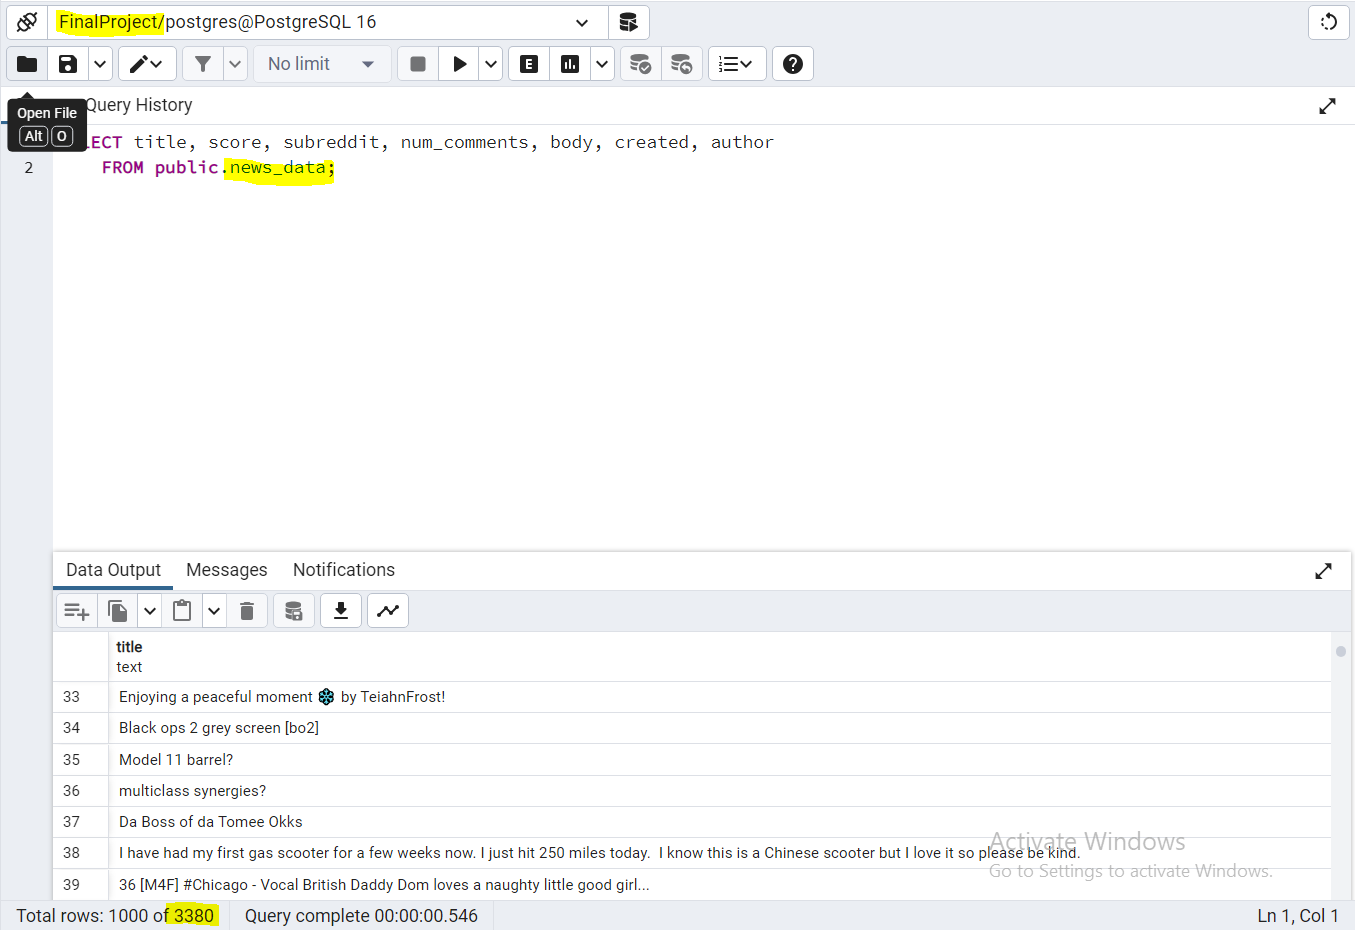

**Observation**: Created new table 'news_data' and inserted all 3380 records into postgres 'FinalProject' database.

### Data Retrieval:

In [8]:
# Connect to your PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="FinalProject",
    user="postgres",
    password="08121995")

# Create a cursor object
cur = conn.cursor()

# Query to retrieve data from the news_data table
query = "SELECT * FROM news_data"

# Execute the query
cur.execute(query)

# Fetch all rows from the result
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Create a DataFrame from the fetched rows
news = pd.DataFrame(rows, columns=['title', 'author', 'score', 'subreddit', 'num_comments', 'body', 'created'])

# Display the DataFrame
news

,title,author,score,subreddit,num_comments,body,created
0,Whoever you piss on must give you a kiss,1,shittysuperpowers,0,If you refuse to kiss the person back then you...,2024-04-05,StupiderBrainiac
1,Gro Clinics Brisbane,1,HairTransplants,0,Has anyone used the Gro Clinics Brisbane? How ...,2024-04-05,JFS1495
2,You know what... I'm about to go listen to som...,1,KendrickLamar,0,Kendrick and Drake is wasting our time...\n\nK...,2024-04-05,delusional-tde
3,When my partner and I objectify each other in bed,1,AskWomenNoCensor,1,My bf and I have a real big kink for being sup...,2024-04-05,Ok_One2418
4,Maturity.,1,Poems,0,Maturity is often likened to age. ‘In just a f...,2024-04-05,TheLowlyPoet
...,...,...,...,...,...,...,...
3375,These are a MUST next time you’re at Target,1,candy,0,sour perfection 🤌🏻🤌🏻,2024-04-05,give_it_a_goog
3376,Teal Junk-yard bird made from an old desk.,1,Luthier,0,Just as described. I used Rit dye on it. Hones...,2024-04-05,Ok_Programmer4949
3377,How do i fix this issue in gta?,1,gtaonline,0,"Any time I try to join a friend it says ""faile...",2024-04-05,21kDark
3378,Prune juice was made by Satan,1,BabyBumps,0,I’ve been feeling extra tired lately and was t...,2024-04-05,gay_mother


**Observations**:
- Data was successfully retrieved from postgres database.
- The dataframe has 7 columns and 3380 records.

# Exploratory Data Analysis :

In [9]:
# Display concise summary of the news_data DataFrame including data types, non-null values, and memory usage
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3380 entries, 0 to 3379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3380 non-null   object
 1   author        3380 non-null   object
 2   score         3380 non-null   int64 
 3   subreddit     3380 non-null   object
 4   num_comments  3380 non-null   int64 
 5   body          3099 non-null   object
 6   created       3380 non-null   object
dtypes: int64(2), object(5)
memory usage: 211.2+ KB


### Data cleaning:

In [57]:
# Check for duplicate rows
duplicate_rows = news_data[news_data.duplicated()]
duplicate_rows

,title,author,score,subreddit,num_comments,body,created
82,My Father (Don Wanna Call him that) Has A Narc...,FigGroundbreaking486,1,confessions,0,He's Hurting My Siblings And My Mother Emotion...,05-04-2024
340,Capiscum going crazy on Chch,CantCme2020,1,nzgardening,0,Hi all. First post here. :) \n\n\nSHORT VER...,05-04-2024
518,راندوم سونج,Jackio_,1,Egy_Music_Vibes,0,كنت بتكون ، عيني و نظرها \nبس لا ميهون نفسي اخ...,05-04-2024
700,Why is KHEAA saying my income exceeds amount a...,Elliot_The_Idiot7,1,college,0,I earned KEES money last year that automatical...,05-04-2024
1408,What to do with weird Rooster?,dmid2526,1,silkiechickens,0,I have a silkie rooster that was hatched alone...,05-04-2024
1420,What areas in zone 5+ / outside London can you...,Faultylntelligence,1,london,0,"So I was living in Weybridge, Surrey previousl...",05-04-2024
1815,Puck Screen (51mm),ranus_247,1,IndiaCoffee,0,Most of the options are either very expensive ...,05-04-2024
1991,Dale Wilson,actbob1000,1,dalewilson,0,NaN,05-04-2024
1992,Dale Wilson,actbob1000,1,dalewilson,0,NaN,05-04-2024
2011,"MEGA Alakazam 9836 4093 8457 2 people ready,...",Fasciala,1,PokemonGoFriends,0,"MEGA Alakazam 9836 4093 8457 2 people ready,...",05-04-2024


There are 12 duplicate records present in the dataframe.

In [58]:
# Drop duplicate rows
news_data = news_data.drop_duplicates()

In [59]:
# Drop rows with null values in the 'body' column as body column has few missing records.
news_data = news_data.dropna(subset=['body'])

# Reset the index after dropping rows
news_data.reset_index(drop=True, inplace=True)

#Rechecking for null values using info()
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3091 non-null   object
 1   author        3091 non-null   object
 2   score         3091 non-null   int64 
 3   subreddit     3091 non-null   object
 4   num_comments  3091 non-null   int64 
 5   body          3091 non-null   object
 6   created       3091 non-null   object
dtypes: int64(2), object(5)
memory usage: 169.2+ KB


In [60]:
# Check the first few rows
news_data.head()

,title,author,score,subreddit,num_comments,body,created
0,Whoever you piss on must give you a kiss,StupiderBrainiac,1,shittysuperpowers,0,If you refuse to kiss the person back then you...,05-04-2024
1,Gro Clinics Brisbane,JFS1495,1,HairTransplants,0,Has anyone used the Gro Clinics Brisbane? How ...,05-04-2024
2,You know what... I'm about to go listen to som...,delusional-tde,1,KendrickLamar,0,Kendrick and Drake is wasting our time...\n\nK...,05-04-2024
3,When my partner and I objectify each other in bed,Ok_One2418,1,AskWomenNoCensor,1,My bf and I have a real big kink for being sup...,05-04-2024
4,Maturity.,TheLowlyPoet,1,Poems,0,Maturity is often likened to age. ‘In just a f...,05-04-2024


In [61]:
# Summary statistics for numerical columns
news_data.describe()

,score,num_comments
count,3091.000000,3091.000000
mean,1.268198,0.320285
std,1.797577,1.269880
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,53.000000,52.000000


**Observations** :
**For 'score' column:**

- **Count:** There are 3091 non-null entries for the 'score' column, indicating no missing values.
- **Mean:** The average score is approximately 1.27, suggesting that most items receive a low score.
- **Standard Deviation (std):** The standard deviation is 1.80, indicating variability in scores around the mean. Some items have scores considerably higher or lower than the average.
- **Minimum (min) and Maximum (max):** The lowest score is 0, while the highest score is 53, indicating a wide range of scores in the dataset.
- **Percentiles (25%, 50%, 75%):** 25% of items have a score of 1 or lower, 50% have a score of 1 or lower (median), and 75% have a score of 1 or lower. This suggests that the majority of items have relatively low scores.

**For 'num_comments' column:**

- **Count:** There are 3091 non-null entries for the 'num_comments' column, indicating no missing values.
- **Mean:** The average number of comments is approximately 0.32, indicating that most items receive very few comments.
- **Standard Deviation (std):** The standard deviation is 1.27, indicating variability in the number of comments around the mean. Some items have a significantly higher or lower number of comments.
- **Minimum (min) and Maximum (max):** The lowest number of comments is 0, while the highest number of comments is 52, indicating a wide range of comment counts in the dataset.
- **Percentiles (25%, 50%, 75%):** 25% of items have 0 comments, 50% have 0 comments (median), and 75% have 0 comments. This suggests that the majority of items receive very few comments, with a large proportion having no comments at all.


In [62]:
# Summary statistics for categorical columns
news_data.describe(include=['object'])

,title,author,subreddit,body,created
count,3091,3091,3091,3091,3091
unique,3007,2882,2180,3020,1
top,Advice Needed: Enhancing Job Prospects in Prog...,DankMemesRSavage,KendrickLamar,Farmland Canada 🇨🇦 Daily user CFC 211961504 . ...,05-04-2024
freq,9,15,98,6,3091


**Observation** :

- There are 3091 non-null values in each of the categorical columns (title, author, subreddit, body, created).

- The title, author, and subreddit columns have a high number of unique values, indicating a diverse set of titles, authors, and subreddits.

- The most frequent title is "Advice Needed: Enhancing Job Prospects in Programming?" occurring 9 times.

- The most frequent author is "DankMemesRSavage" occurring 15 times.

- The most frequent subreddit is "KendrickLamar" occurring 98 times.

- The most frequent body of the post is a text indicating the body of a post, occurring 6 times.

- All creation dates are the same, as I have downloaded data on 4th May.

In [63]:
# Drop the 'created' column
news_data.drop(columns=['created'], inplace=True)
print('News_data columns after dropping column "created"' , news_data.columns)

News_data columns after dropping column "created" Index(['title', 'author', 'score', 'subreddit', 'num_comments', 'body'], dtype='object')


## Univariate Analysis:

### 1. Score

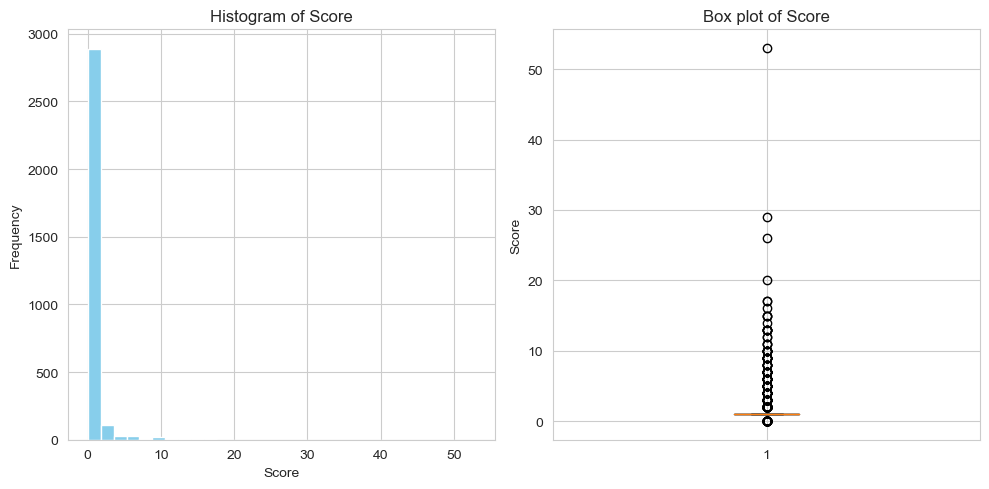

In [64]:
# Plotting histogram and box plot for 'Score' column using matplotlib
import matplotlib.pyplot as plt

# Create a figure and axis object for subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for 'score' column
axs[0].hist(news_data['score'], bins=30, color='skyblue')
axs[0].set_title('Histogram of Score')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')

# Plot box plot for 'score' column
axs[1].boxplot(news_data['score'])
axs[1].set_title('Box plot of Score')
axs[1].set_ylabel('Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Observations**:
- The distribution is highly skewed to the right, with the majority of posts having low scores.
- There are some outliers with high scores.
- Some posts have exceptionally high scores compared to the majority, contributing to the skewness of the distribution.

### 2. Number of Comments

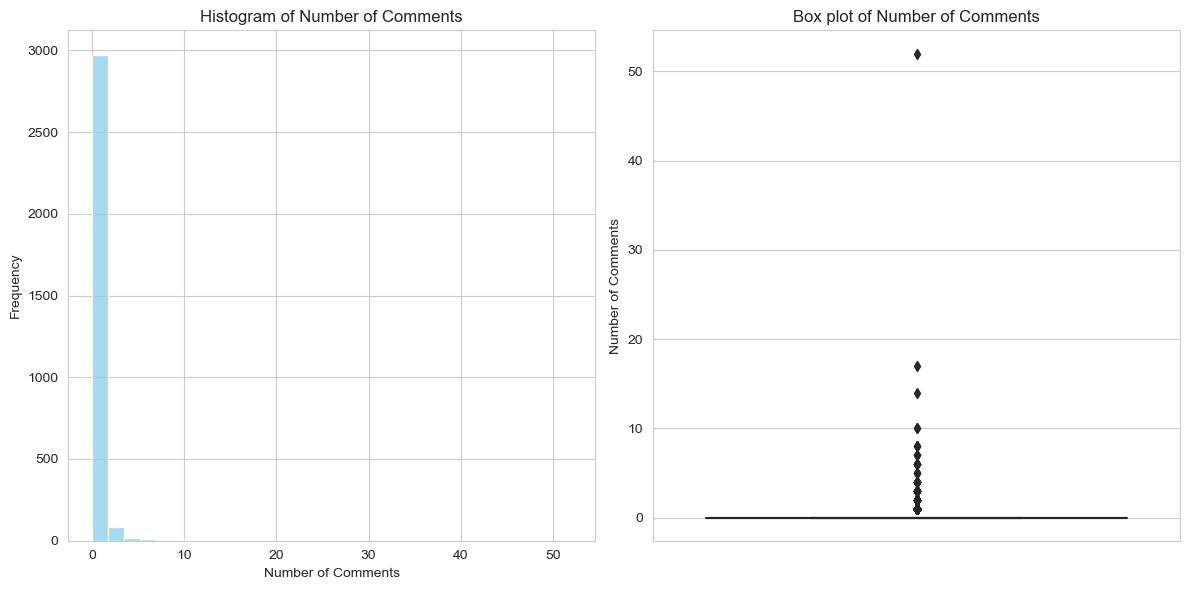

In [65]:
# Plotting histogram and box plot for 'Score' column using seaborn
import seaborn as sns
# Set the style
sns.set_style("whitegrid")

# Create a figure and axis object for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'num_comments' column using Seaborn
sns.histplot(news_data['num_comments'], bins=30, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of Number of Comments')
axs[0].set_xlabel('Number of Comments')
axs[0].set_ylabel('Frequency')

# Plot box plot for 'num_comments' column using Seaborn
sns.boxplot(y=news_data['num_comments'], ax=axs[1], color='green')
axs[1].set_title('Box plot of Number of Comments')
axs[1].set_ylabel('Number of Comments')

# Show the plots
plt.tight_layout()
plt.show()

**Observations**:
- The distribution is highly skewed to the right, indicating that most posts receive very few comments.
- The median number of comments is close to zero, suggesting that the majority of posts have minimal engagement.
- There is variability in the number of comments, with outliers representing posts with exceptionally high comment counts.
- Overall, the data indicates a wide range of engagement levels among posts, with the majority receiving minimal interaction.

### 3. Author

In [66]:
# Calculate the number of unique authors
num_authors = news_data['author'].nunique()
print("Number of unique authors:", num_authors)

Number of unique authors: 2882


Top 10 authors with their counts of posts:
DankMemesRSavage       15
AutoModerator          12
Suffered_Heart          9
jvc72                   8
eigo-bunpou             7
sbbuet                  6
adulting4kids           6
IslamicInspirations     5
Firm_Resident3315       4
Kwikis1                 4
Name: author, dtype: int64


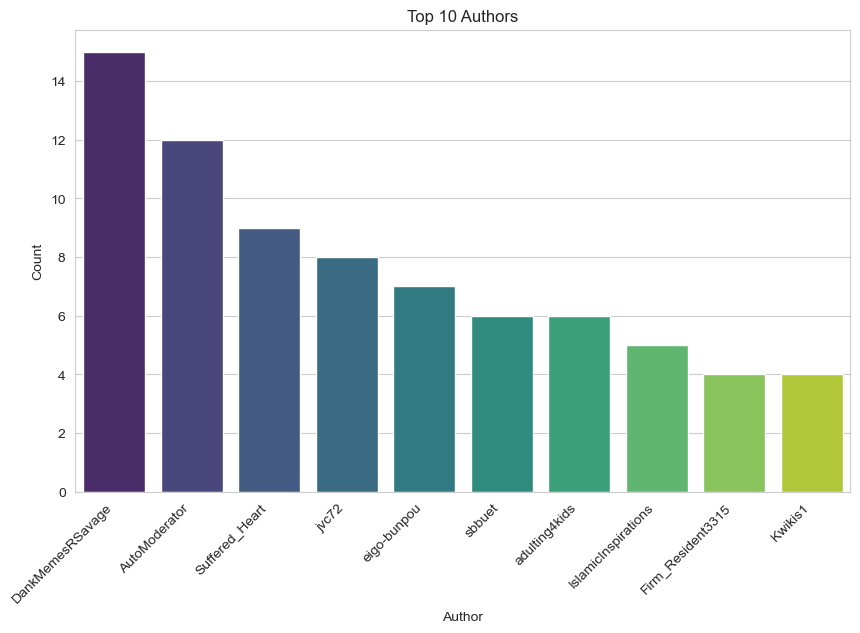

In [67]:
# Calculate the number of posts by each author
author_counts = news_data['author'].value_counts().head(10)

# Print the top 10 authors with their counts of posts
print("Top 10 authors with their counts of posts:")
print(author_counts)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a countplot for the 'author' column
sns.countplot(x='author',                  # Specify the column to plot on the x-axis
              data=news_data,              # Specify the DataFrame containing the data
              order=news_data['author'].value_counts().index[:10],  # Order the bars by the count of each author (top 10)
              palette='viridis')          # Choose the color palette for the plot

# Add title and labels
plt.title('Top 10 Authors')                # Add a title to the plot
plt.xlabel('Author')                        # Add label for the x-axis
plt.ylabel('Count')                         # Add label for the y-axis

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')         # Rotate x-axis labels by 45 degrees and align them to the right

# Display the plot
plt.show()

**Observations** :
- DankMemesRSavage and AutoModerator stand out as the most prolific posters among the top 10 authors.
- There is variation in the number of posts among the top 10 authors, with some authors contributing significantly more than others.
- AutoModerator's presence in the top 10 suggests the potential presence of automated or system-generated content.
- This analysis provides insights into the distribution of posts among the top authors in the dataset, highlighting the diversity of contributions.

### 4. Subreddit

In [68]:
# Calculate the number of unique subreddits
num_subreddits = news_data['subreddit'].nunique()
print("Number of unique subreddits:", num_subreddits)

Number of unique subreddits: 2180


Top 10 subreddits with their counts of posts:
KendrickLamar         98
Drizzy                77
Helldivers            25
teenagers             19
MakeNewFriendsHere    18
couponsthatwork       15
LAClippers            13
playboicarti          11
Advice                11
pcmasterrace           9
Name: subreddit, dtype: int64


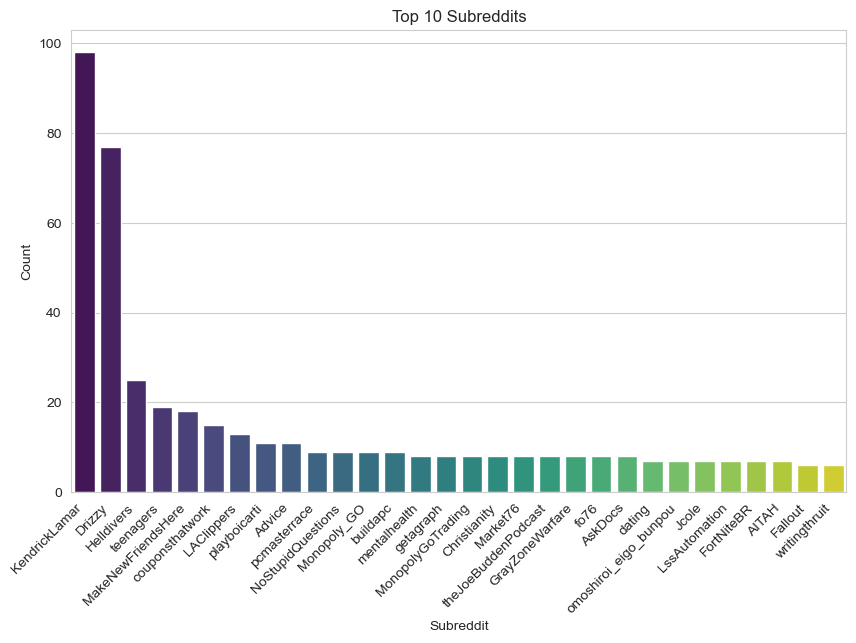

In [69]:
# Calculate the number of posts in each subreddit
subreddit_counts = news_data['subreddit'].value_counts().head(10)

# Print the top 10 subreddits with their counts of posts
print("Top 10 subreddits with their counts of posts:")
print(subreddit_counts)

subreddit_counts = news_data['subreddit'].value_counts().head(30)
# Plot the top 10 subreddits with their counts of posts
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=news_data, order=subreddit_counts.index, palette='viridis')
plt.title('Top 10 Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**

- KendrickLamar and Drizzy continue to stand out as the most active subreddits among the top 30.
- There is a gradual decrease in the number of posts as we move down the list, indicating a long tail distribution of subreddit activity.
- The diversity of topics represented in the top 30 subreddits suggests a wide range of interests within the dataset.
- This analysis provides a comprehensive overview of the distribution of posts among the top subreddits, highlighting the popularity and engagement levels of different subreddit communities.

## Research Question 1: Engagement and Popular Topics

A correlation coefficient between the number of comments ('num_comments') and the score ('score') of news articles:  0.29934995061692954


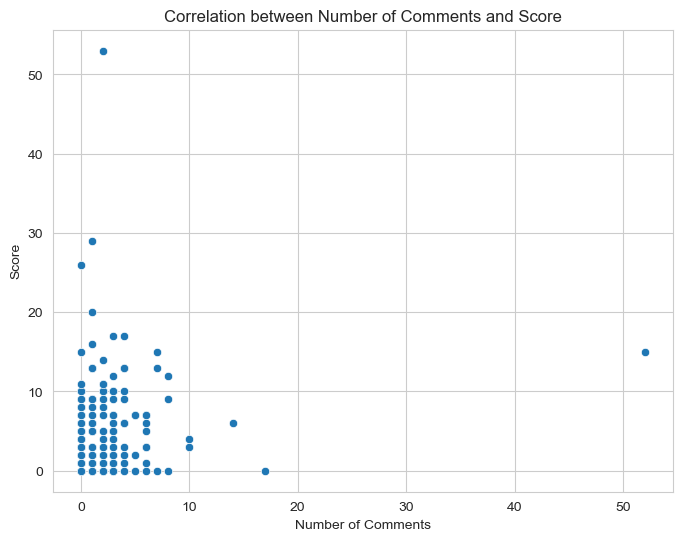

In [70]:
# Correlation between 'num_comments' and 'score'
correlation = news_data['num_comments'].corr(news_data['score'])
print("A correlation coefficient between the number of comments ('num_comments') and the score ('score') of news articles: ",correlation)
# Plot the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_comments', y='score', data=news_data)
plt.title('Correlation between Number of Comments and Score')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.show()

**Observation:** 
- A positive correlation coefficient indicates that there is a tendency for the two variables to increase or decrease together.
- The magnitude of the correlation coefficient (0.299) suggests a moderate relationship between the variables.
- The correlation is not perfect (i.e., not equal to 1), indicating that there is some variability in the relationship between 'num_comments' and 'score'.

In summary, while there is a tendency for news articles with more comments to have higher scores, the correlation is not very strong, and other factors may also influence the score of an article.

#### Engagement Metrics for Top Authors:

In [71]:
# Group by authors and calculate average 'num_comments' and 'score'
author_engagement = news_data.groupby('author')[['num_comments', 'score']].mean().sort_values(by='num_comments', ascending=False).head(10)
author_engagement

,num_comments,score
author,,
GDT_Bot,52.0,15.0
Bluerobot1,17.0,0.0
January_Weather,10.0,3.0
ToTheGrave11,8.0,9.0
TechnicalPresent109,8.0,0.0
see_four,7.5,5.5
Unsummoned1,7.0,0.0
Comfortable-Run7615,7.0,3.5
Evra202,6.0,7.0


**Observations**:
Authors like GDT_Bot and ToTheGrave11 receive high engagement with positive feedback, while others like Bluerobot1 and TechnicalPresent109 engage actively but receive lower scores, suggesting potential room for improvement in content quality.

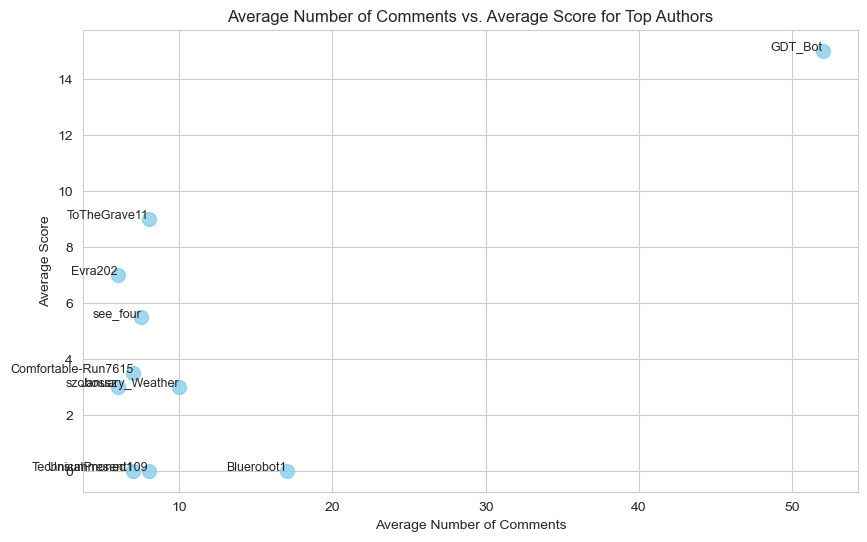

In [72]:
# Data for top authors and their average 'num_comments' and 'score'
top_authors = author_engagement.index
avg_num_comments = author_engagement['num_comments']
avg_score = author_engagement['score']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_num_comments, avg_score, s=100, alpha=0.8, color='skyblue')

# Add labels for each point
for author, comments, score in zip(top_authors, avg_num_comments, avg_score):
    plt.text(comments, score, author, fontsize=9, ha='right')

# Add titles and labels
plt.title('Average Number of Comments vs. Average Score for Top Authors')
plt.xlabel('Average Number of Comments')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

**Observations**:

- GDT_Bot: This author has the highest average number of comments (52.0) and a relatively high average score (15.0), indicating significant engagement and popularity among users. Posts by GDT_Bot tend to generate a large amount of discussion and receive high scores.
- Bluerobot1: Despite having a high average number of comments (17.0), posts by Bluerobot1 have an average score of 0.0. This suggests that while their posts generate a lot of discussion, they may not necessarily receive high scores from users.
- January_Weather: With an average of 10.0 comments per post and an average score of 3.0, January_Weather's posts receive moderate engagement and scores.
- ToTheGrave11: This author has a lower average number of comments (8.0) compared to GDT_Bot but achieves a higher average score (9.0), indicating that their posts are highly regarded by users despite generating fewer comments.
- TechnicalPresent109 and Unsummoned1: These authors have a similar pattern to Bluerobot1, with a relatively high average number of comments but a score of 0.0, suggesting that their posts may generate discussion but do not receive positive ratings from users.

#### Engagement Metrics for Top Subreddits:

In [73]:
# Group by subreddits and calculate average 'num_comments' and 'score'
subreddit_engagement = news_data.groupby('subreddit')[['num_comments', 'score']].mean().sort_values(by='num_comments', ascending=False).head(10)

In [74]:
subreddit_engagement

,num_comments,score
subreddit,,
hockey,52.00,15.0
goldenknights,6.00,7.0
MoissaniteCreations,4.00,1.0
GoodAssSub,3.50,6.0
GCSE,3.00,1.0
RandomActsofCards,3.00,1.0
Brawlstars,3.00,1.0
GranblueFantasyRelink,3.00,1.0
nba,2.75,2.5


**Observations**: The subreddit "hockey" stands out with the highest number of comments (52.00) and a relatively high score of 15.0, indicating active engagement and positive reception within the community.
Other subreddits like "goldenknights," "MoissaniteCreations," and "GoodAssSub" also exhibit engagement, albeit with varying scores, suggesting diverse levels of community interaction and content quality across different subreddits.

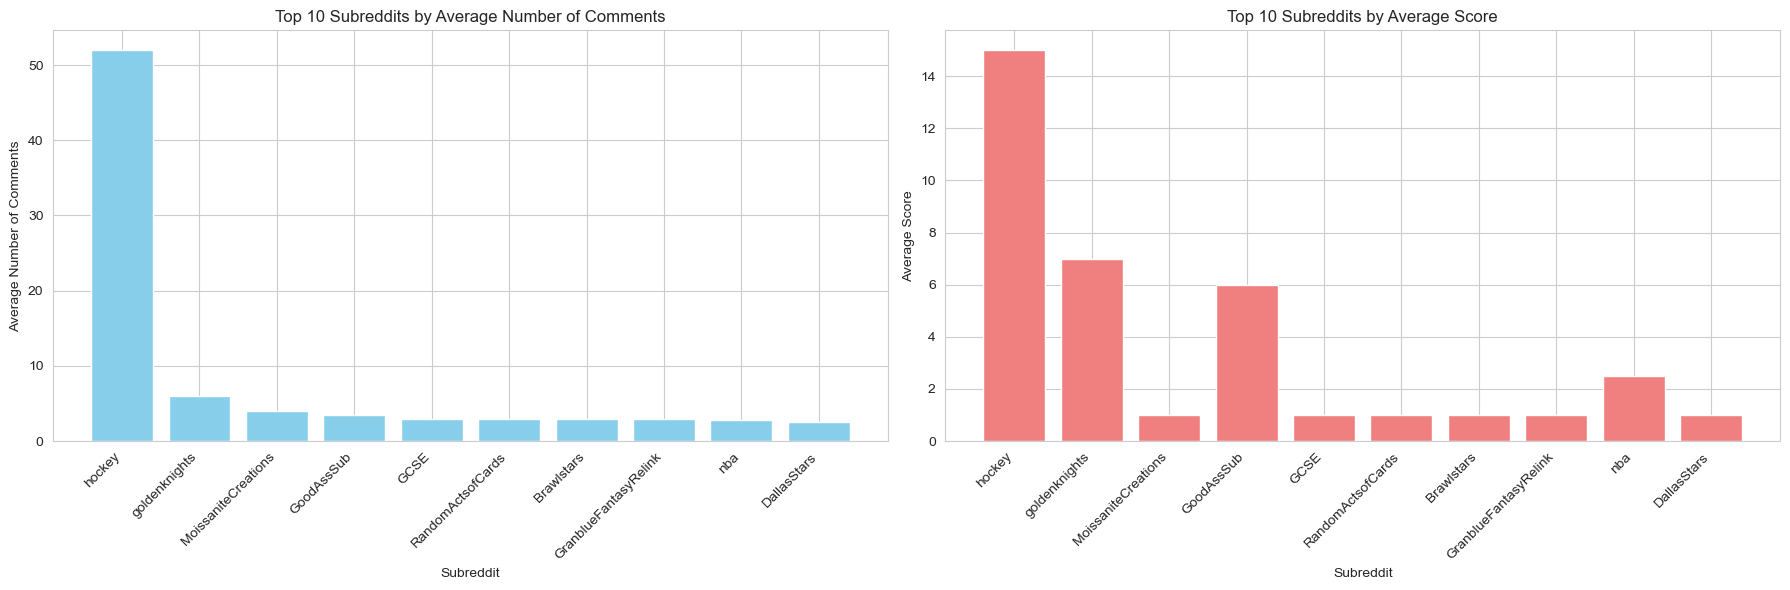

In [75]:
import matplotlib.pyplot as plt
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the average number of comments for top subreddits
axes[0].bar(subreddit_engagement.index, subreddit_engagement['num_comments'], color='skyblue')
axes[0].set_title('Top 10 Subreddits by Average Number of Comments')
axes[0].set_xlabel('Subreddit')
axes[0].set_ylabel('Average Number of Comments')
axes[0].set_xticklabels(subreddit_engagement.index, rotation=45, ha='right')

# Plot the average score for top subreddits
axes[1].bar(subreddit_engagement.index, subreddit_engagement['score'], color='lightcoral')
axes[1].set_title('Top 10 Subreddits by Average Score')
axes[1].set_xlabel('Subreddit')
axes[1].set_ylabel('Average Score')
axes[1].set_xticklabels(subreddit_engagement.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Observations** :
**Most engaging subreddit**-
1. hockey: This subreddit stands out with the highest average number of comments (52.00) and a relatively high average score (15.0), indicating high engagement and popularity among users.
2. goldenknights: Despite having a lower average number of comments compared to 'hockey', this subreddit still has a notable average score of 7.0, suggesting a significant level of engagement and interest among users.
3. MoissaniteCreations, GoodAssSub, GCSE, RandomActsofCards, Brawlstars, GranblueFantasyRelink, and DallasStars: These subreddits have lower average numbers of comments ranging from 2.50 to 4.00, with corresponding average scores ranging from 1.0 to 6.0. While these subreddits may have lower engagement compared to 'hockey' and 'goldenknights', they still attract some level of user interaction and interest.
4. nba: Despite having a slightly lower average number of comments (2.75), this subreddit has a relatively high average score (2.5), indicating a favorable response and engagement from users.

Overall, the analysis suggests that 'hockey' is the most engaging subreddit among the top ones listed, followed by 'goldenknights'. The other subreddits also exhibit varying levels of engagement, with some having higher scores despite fewer comments, indicating quality discussions or content.

# Data Preparation:

## Feautre engineering:

In [76]:
import numpy as np

# Calculate the length of the title
news_data['title_length'] = news_data['title'].apply(len)

# Calculate the word count of the body, handling NaN values
news_data['body_word_count'] = news_data['body'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

# Check if the title contains a question mark
news_data['has_question_mark'] = news_data['title'].str.contains('\?')

In [77]:
news_data

,title,author,score,subreddit,num_comments,body,title_length,body_word_count,has_question_mark
0,Whoever you piss on must give you a kiss,StupiderBrainiac,1,shittysuperpowers,0,If you refuse to kiss the person back then you...,41,14,False
1,Gro Clinics Brisbane,JFS1495,1,HairTransplants,0,Has anyone used the Gro Clinics Brisbane? How ...,20,27,False
2,You know what... I'm about to go listen to som...,delusional-tde,1,KendrickLamar,0,Kendrick and Drake is wasting our time...\n\nK...,56,85,False
3,When my partner and I objectify each other in bed,Ok_One2418,1,AskWomenNoCensor,1,My bf and I have a real big kink for being sup...,49,135,False
4,Maturity.,TheLowlyPoet,1,Poems,0,Maturity is often likened to age. ‘In just a f...,9,180,False
...,...,...,...,...,...,...,...,...,...
3086,These are a MUST next time you’re at Target,give_it_a_goog,1,candy,0,sour perfection 🤌🏻🤌🏻,43,3,False
3087,Teal Junk-yard bird made from an old desk.,Ok_Programmer4949,1,Luthier,0,Just as described. I used Rit dye on it. Hones...,42,60,False
3088,How do i fix this issue in gta?,21kDark,1,gtaonline,0,"Any time I try to join a friend it says ""faile...",31,38,True
3089,Prune juice was made by Satan,gay_mother,1,BabyBumps,0,I’ve been feeling extra tired lately and was t...,29,118,False


In [78]:
# Create bins for 'score' column
news_data['score_bin'] = pd.cut(news_data['score'], bins=5, labels=False)
# Create bins for 'num_comments' column
news_data['comments_bin'] = pd.cut(news_data['num_comments'], bins=5, labels=False)

In [79]:
# Drop the original 'score' and 'num_comments' columns
news_data.drop(['score', 'num_comments'], axis=1, inplace=True)

In [80]:
# Check the unique values in the new columns
print("Unique values in 'score_bin':", news_data['score_bin'].unique())
print("Unique values in 'comments_bin':", news_data['comments_bin'].unique())

Unique values in 'score_bin': [0 4 1 2]
Unique values in 'comments_bin': [0 4 1]


# Prepped Data Review:

In [81]:
news_data.head()

,title,author,subreddit,body,title_length,body_word_count,has_question_mark,score_bin,comments_bin
0,Whoever you piss on must give you a kiss,StupiderBrainiac,shittysuperpowers,If you refuse to kiss the person back then you...,41,14,False,0,0
1,Gro Clinics Brisbane,JFS1495,HairTransplants,Has anyone used the Gro Clinics Brisbane? How ...,20,27,False,0,0
2,You know what... I'm about to go listen to som...,delusional-tde,KendrickLamar,Kendrick and Drake is wasting our time...\n\nK...,56,85,False,0,0
3,When my partner and I objectify each other in bed,Ok_One2418,AskWomenNoCensor,My bf and I have a real big kink for being sup...,49,135,False,0,0
4,Maturity.,TheLowlyPoet,Poems,Maturity is often likened to age. ‘In just a f...,9,180,False,0,0


In [82]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3091 non-null   object
 1   author             3091 non-null   object
 2   subreddit          3091 non-null   object
 3   body               3091 non-null   object
 4   title_length       3091 non-null   int64 
 5   body_word_count    3091 non-null   int64 
 6   has_question_mark  3091 non-null   bool  
 7   score_bin          3091 non-null   int64 
 8   comments_bin       3091 non-null   int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 196.3+ KB


**Observations**:

The initial dataset had 7 columns. Now, after the data preparation phase, we have additional columns:

Title: The title of the post.

Author: The author of the post.

Subreddit: The subreddit where the post was made.

Body: The body of the post.

Title_length: The length of the title.

Body_word_count: The word count of the body.

Has_question_mark: Boolean indicating whether the title contains a question mark.

Score_bin: Binning of scores into categories.

Comments_bin: Binning of number of comments into categories.

In [83]:
# Summary statistics for newly added columns
new_columns_stats = news_data[['title_length', 'body_word_count', 'has_question_mark', 'score_bin', 'comments_bin']].describe()
print("Summary Statistics for Newly Added Columns:")
print(new_columns_stats)


Summary Statistics for Newly Added Columns:
       title_length  body_word_count    score_bin  comments_bin
count   3091.000000      3091.000000  3091.000000   3091.000000
mean      42.429634        89.671951     0.008735      0.001941
std       31.222893       169.925239     0.117642      0.076299
min        1.000000         0.000000     0.000000      0.000000
25%       22.000000        16.500000     0.000000      0.000000
50%       34.000000        43.000000     0.000000      0.000000
75%       54.000000       100.000000     0.000000      0.000000
max      300.000000      4857.000000     4.000000      4.000000


**Some observations based on the summary statistics for the newly added columns**:
1. title_length:
The mean title length is approximately 42.46 characters, with a standard deviation of around 31.24.
The shortest title is 1 character long, while the longest title is 300 characters.
25% of the titles have a length of 22 characters or less, while 75% have a length of 54.5 characters or less.
2. body_word_count:
The mean word count in the body is approximately 89.75, with a standard deviation of around 169.79.
The shortest body has 0 words, while the longest body contains 4857 words.
25% of the bodies have a word count of 17 words or less, while 75% have a word count of 100.5 words or less.
3. score_bin:
The majority of the posts (approximately 99.1%) have a score_bin of 0, indicating that they have a score of 0.
There is a small portion of posts (approximately 0.9%) that have a non-zero score_bin, with a maximum value of 4.
4. comments_bin:
Similarly, the majority of the posts (approximately 99.8%) have a comments_bin of 0, indicating that they have 0 comments.
A small portion of posts (approximately 0.2%) have a non-zero comments_bin, with a maximum value of 4.

Frequency of Occurrences for 'has_question_mark':
False    2274
True      817
Name: has_question_mark, dtype: int64


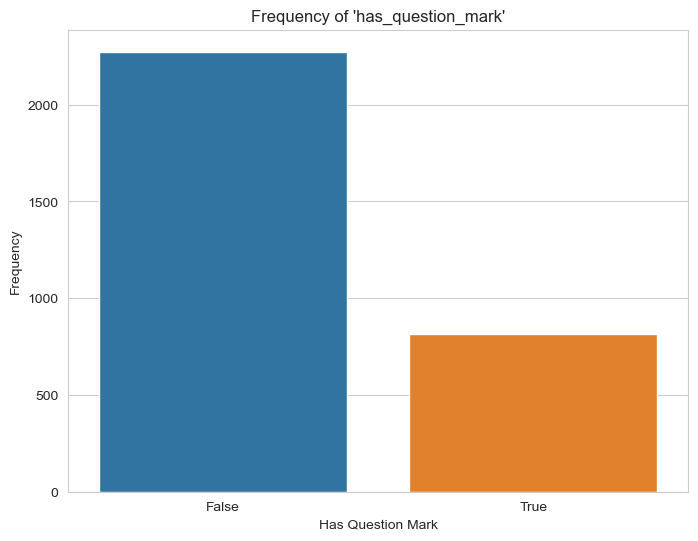

In [84]:
# Calculate frequency of occurrences for 'has_question_mark'
question_mark_counts = news_data['has_question_mark'].value_counts()

# Display the frequency counts
print("Frequency of Occurrences for 'has_question_mark':")
print(question_mark_counts)
# Visualize the frequency of 'has_question_mark' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='has_question_mark', data=news_data)
plt.title("Frequency of 'has_question_mark'")
plt.xlabel("Has Question Mark")
plt.ylabel("Frequency")
plt.show()

**Observations**:
The inference we can draw from the frequency of occurrences for the 'has_question_mark' column is that a significant portion of the posts do not have a question mark in their titles. This could suggest that asking questions in the title may not be a common practice among the posters.

# Investigative Analysis & Results :

# Research Question 2: Sentiment Analysis and Topic Modeling

VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.

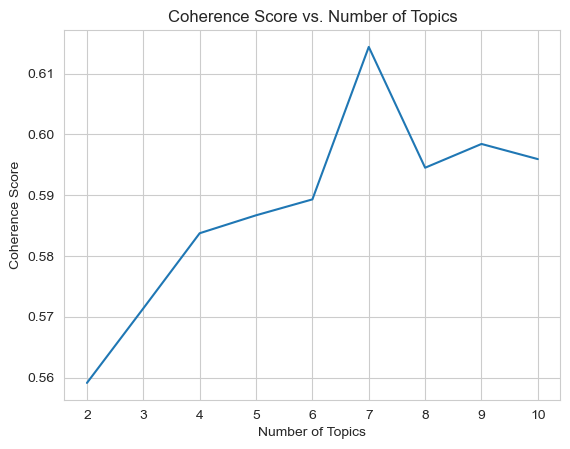

Optimal Number of Topics: 7
Top words for each topic:
Topic 1: 0.020*"help" + 0.012*"need" + 0.011*"question" + 0.008*"looking" + 0.007*"please" + 0.007*"may" + 0.007*"2024" + 0.006*"want" + 0.006*"2" + 0.006*"get"
Topic 2: 0.012*"’" + 0.011*"”" + 0.010*"“" + 0.007*"user" + 0.007*"one" + 0.005*"post" + 0.005*"make" + 0.004*"ask" + 0.004*"sub" + 0.003*"great"
Topic 3: 0.024*"’" + 0.011*"3" + 0.009*"would" + 0.008*"new" + 0.008*"im" + 0.007*"kendrick" + 0.005*"drake" + 0.005*"days" + 0.005*"de" + 0.005*"go"
Topic 4: 0.010*"anyone" + 0.010*"new" + 0.005*"one" + 0.005*"night" + 0.005*"pc" + 0.004*"left" + 0.004*"update" + 0.004*"working" + 0.004*"ive" + 0.003*"feel"
Topic 5: 0.011*"drake" + 0.011*"’" + 0.008*"like" + 0.006*"kendrick" + 0.006*"help" + 0.005*"daughter" + 0.005*"got" + 0.004*"happened" + 0.004*"music" + 0.004*"2"
Topic 6: 0.010*"’" + 0.007*"get" + 0.007*"going" + 0.005*"code" + 0.005*"anyone" + 0.005*"10" + 0.005*"daily" + 0.005*"dont" + 0.005*"thanks" + 0.005*"please"
Topic 

,title,author,subreddit,body,title_length,body_word_count,has_question_mark,score_bin,comments_bin,title_processed,sentiment,topic
0,Whoever you piss on must give you a kiss,StupiderBrainiac,shittysuperpowers,If you refuse to kiss the person back then you...,41,14,False,0,0,"[whoever, piss, must, give, kiss]",0.0258,3
1,Gro Clinics Brisbane,JFS1495,HairTransplants,Has anyone used the Gro Clinics Brisbane? How ...,20,27,False,0,0,"[gro, clinics, brisbane]",0.0000,2
2,You know what... I'm about to go listen to som...,delusional-tde,KendrickLamar,Kendrick and Drake is wasting our time...\n\nK...,56,85,False,0,0,"[know, im, go, listen, j, cole]",0.0000,2
3,When my partner and I objectify each other in bed,Ok_One2418,AskWomenNoCensor,My bf and I have a real big kink for being sup...,49,135,False,0,0,"[partner, objectify, bed]",0.0000,5
4,Maturity.,TheLowlyPoet,Poems,Maturity is often likened to age. ‘In just a f...,9,180,False,0,0,[maturity],0.0000,3


In [85]:
# Importing required libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

# Remove punctuation and convert text to lowercase
# lambda x: Define an anonymous function (lambda function) that takes one argument (x) and performs the following operations on it
# x.translate(): Remove punctuation from the string x. It uses the translate() method along with str.maketrans() to create a translation table that maps each punctuation character to None, effectively removing them from the string
# .lower(): Convert the string to lowercase
# The processed text is stored in a new column 'title_processed' in the DataFrame news_data
news_data['title_processed'] = news_data['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

# Tokenize text and remove stop words
# set(stopwords.words('english')): Create a set of English stop words using NLTK's stopwords corpus
# lambda x: Define an anonymous function (lambda function) that performs the following operations
# nltk.word_tokenize(x): Tokenize the string x into words using NLTK's word_tokenize() function
# Used list comprehension to iterate over each word in the tokenized text and keep only those words that are not in the set of stop words
# The processed text (without stop words) is stored back in the 'title_processed' column of the DataFrame news_data
stop_words = set(stopwords.words('english'))
news_data['title_processed'] = news_data['title_processed'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stop_words])

# Sentiment Analysis
# SentimentIntensityAnalyzer(): Initialize the SentimentIntensityAnalyzer object from NLTK's Vader sentiment analysis tool
# join(x): Join the list of words x into a single string separated by whitespace
# sid.polarity_scores(...): Compute the polarity scores (positive, negative, neutral, and compound) of the joined string using the SentimentIntensityAnalyzer object sid
# ['compound']: Extract the compound polarity score, which represents the overall sentiment of the text
# The compound polarity score is stored in a new column 'sentiment' in the DataFrame news_data
sid = SentimentIntensityAnalyzer()
news_data['sentiment'] = news_data['title_processed'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

# Tokenize text and create a dictionary
# Dictionary(texts): Create a Gensim Dictionary object from the list of tokenized text
# - The Dictionary object represents a mapping between words and their integer ids in the corpus
# - Each unique word in the corpus is assigned a unique integer id
# - The created Dictionary object is stored in the variable dictionary
texts = news_data['title_processed'].tolist()
dictionary = Dictionary(texts)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Determine the optimal number of topics using coherence score
# - Iterate over candidate numbers of topics from 2 to 10
# - Train an LDA model for each number of topics
# - Compute coherence score for each model
# - Store coherence scores for analysis
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Choose the optimal number of topics
optimal_num_topics = coherence_scores.index(max(coherence_scores)) + 2  # Adding 2 because the range starts from 2
print(f"Optimal Number of Topics: {optimal_num_topics}")

# Train the final LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, passes=10)

# Print the top words for each topic
print("Top words for each topic:")
for topic_id in range(optimal_num_topics):
    print(f"Topic {topic_id + 1}: {lda_model.print_topic(topic_id)}")

# Assign topic to each document
news_data['topic'] = [max(lda_model.get_document_topics(corpus[i]), key=lambda x: x[1])[0] for i in range(len(corpus))]

# Visualize the results or perform further analysis
# You can plot histograms for sentiment distribution or visualize topic distributions, etc.
news_data.head()

### Analysis of LDA Topic Modeling Results

#### Optimal Number of Topics: 7

#### Topic 1: Seeking Help
- Keywords: help, need, question, looking, please
- This topic seems to revolve around users seeking assistance or guidance on various topics or issues.

#### Topic 2: User Engagement
- Keywords: user, post, make, ask, sub
- This topic might represent discussions related to user interactions, posts, and engagement within the community.

#### Topic 3: Entertainment and Pop Culture
- Keywords: kendrick, drake, music, days, new
- This topic likely encompasses discussions about popular culture, music, and entertainment, particularly focusing on artists like Kendrick Lamar and Drake.

#### Topic 4: Technical Support
- Keywords: anyone, new, pc, update, working
- This topic appears to be centered around technical support queries, such as troubleshooting issues with software or hardware.

#### Topic 5: Music and Artists
- Keywords: drake, kendrick, music, daughter, happened
- This topic may involve discussions about specific musicians, their music, and related events or news.

#### Topic 6: Technology and Coding
- Keywords: code, anyone, daily, thanks
- This topic likely covers discussions related to technology, coding, and programming, with users sharing code snippets or seeking assistance.

#### Topic 7: Personal Experiences and Advice
- Keywords: first, time, job, meet, advice
- This topic appears to focus on users sharing personal experiences, seeking advice, or discussing various life events.

Overall, the identified topics reflect diverse areas of interest and engagement within the community, ranging from technical support and coding discussions to entertainment, music, and personal experiences. Understanding these topics can help moderators and community managers better organize discussions, address user needs, and foster community engagement.


## Conclusion from Coherence Score vs. Number of Topics

The coherence score vs. number of topics plot provides valuable insights into the quality and interpretability of the topics generated by the Latent Dirichlet Allocation (LDA) model. Here are the conclusions drawn from the analysis:

- **Optimal Number of Topics:** The plot indicates that the coherence score peaks at a certain number of topics, suggesting an optimal number of topics for the LDA model. In this case, the optimal number of topics is found to be 7.

- **Quality of Topics:** As the number of topics increases, the coherence score generally tends to decrease. This decrease indicates that adding more topics leads to less coherent and interpretable topics. Conversely, reducing the number of topics below the optimal value also results in lower coherence scores, indicating insufficient coverage of underlying themes.

- **Balancing Complexity and Interpretability:** There is a trade-off between the complexity of the model (number of topics) and the interpretability of the topics. While a higher number of topics may capture finer nuances in the data, it can also lead to more fragmented and less interpretable topics. Conversely, a lower number of topics may oversimplify the representation of the underlying themes.

- **Model Interpretability:** The coherence score provides a quantitative measure of the interpretability of the topics. Higher coherence scores indicate more coherent and meaningful topics, which are easier to interpret and analyze. Therefore, selecting the optimal number of topics based on coherence score helps strike a balance between model complexity and interpretability.

Overall, the coherence score vs. number of topics analysis provides valuable guidance for selecting the optimal number of topics in the LDA model, ensuring that the resulting topics are both comprehensive and interpretable for further analysis and insights.


Sentiment Score Statistics:
count    3091.000000
mean        0.032075
std         0.305813
min        -0.875000
25%         0.000000
50%         0.000000
75%         0.025800
max         0.939000
Name: sentiment, dtype: float64


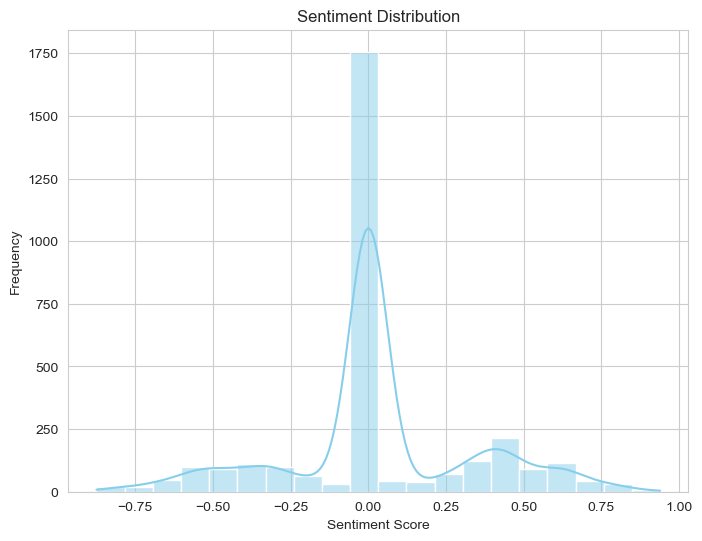

In [87]:
# Statistical analysis of sentiment scores
sentiment_stats = news_data['sentiment'].describe()
print("Sentiment Score Statistics:")
print(sentiment_stats)

# Histogram for sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(news_data['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**Observation** :
1. The sentiment distribution plot illustrates a balanced distribution of sentiment scores, centered around a central tendency of 0.
2. There is a noticeable presence of neutral sentiment within the dataset, indicated by the significant portion of posts clustering around the 0 sentiment score.
3. While the distribution leans slightly towards positive sentiment scores, as evidenced by the right skewness of the plot, it also displays a wide range of scores encompassing both positive and negative sentiments.
4. The variability in sentiment scores reflects the diverse nature of sentiments expressed in the posts, ranging from highly negative to highly positive.
5. Despite this variability, the majority of posts tend to exhibit neutral or slightly positive/negative sentiment, as observed from the density of scores within specific ranges.
6. Notable proportions of posts express more extreme sentiments, indicating the presence of both strongly positive and strongly negative sentiment expressions within the dataset.

Overall, the sentiment distribution plot provides a comprehensive overview of sentiment patterns, emphasizing the complexity and nuances of sentiment dynamics observed in the dataset.


Topic Distribution Statistics:
0    495
2    473
1    443
5    437
6    426
4    424
3    393
Name: topic, dtype: int64


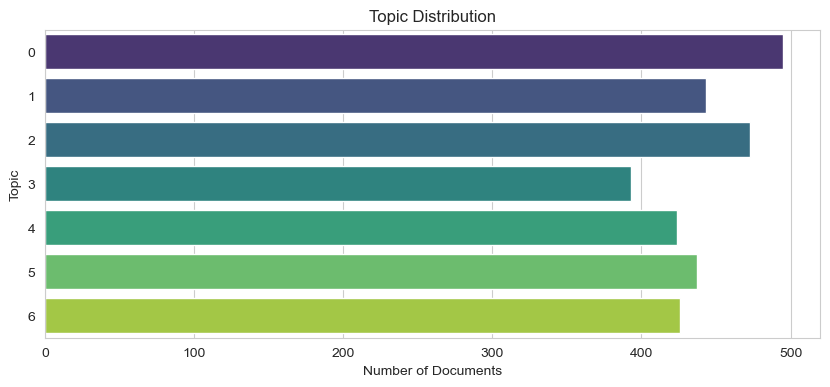

In [88]:
# Statistical analysis of topic distribution
topic_counts = news_data['topic'].value_counts()
print("\nTopic Distribution Statistics:")
print(topic_counts)

# Visualize topic distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='topic', data=news_data, palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Number of Documents')
plt.ylabel('Topic')
plt.show()

### Observations on Topic Distribution Statistics

The statistical analysis of topic distribution provides insights into the distribution of documents across different topics generated by the Latent Dirichlet Allocation (LDA) model. Here are some observations:

- **Topic Distribution:** The topic distribution statistics reveal the number of documents assigned to each topic. This distribution helps understand the prevalence and relevance of different topics within the dataset.

- **Imbalance in Topic Distribution:** There is variation in the number of documents assigned to each topic, indicating an imbalance in topic distribution. For example, Topic 0 has the highest number of documents (495), while Topic 3 has the lowest number of documents (393).

- **Topic Representation:** Topics with higher document counts are more represented in the dataset, suggesting that they may capture more prevalent or prominent themes. Conversely, topics with lower document counts may represent more niche or less prevalent topics.

- **Effect on Analysis:** The topic distribution statistics influence the interpretation and analysis of results obtained from topic modeling. Topics with higher document counts may receive more attention and scrutiny in subsequent analysis, while topics with lower document counts may require additional exploration to understand their significance.

Overall, the topic distribution statistics provide valuable insights into the distribution and representation of topics within the dataset, guiding further analysis and interpretation of topic modeling results.


In [90]:
# Perform sentiment analysis and create a correlation matrix
correlation_matrix = news_data[['sentiment', 'title_length', 'body_word_count', 'score_bin', 'comments_bin']].corr()

In [92]:
correlation_matrix

,sentiment,title_length,body_word_count,score_bin,comments_bin
sentiment,1.000000,0.060024,-0.044163,-0.043824,-0.007083
title_length,0.060024,1.000000,0.078833,0.004441,0.009838
body_word_count,-0.044163,0.078833,1.000000,-0.028592,-0.004868
score_bin,-0.043824,0.004441,-0.028592,1.000000,0.142330
comments_bin,-0.007083,0.009838,-0.004868,0.142330,1.000000


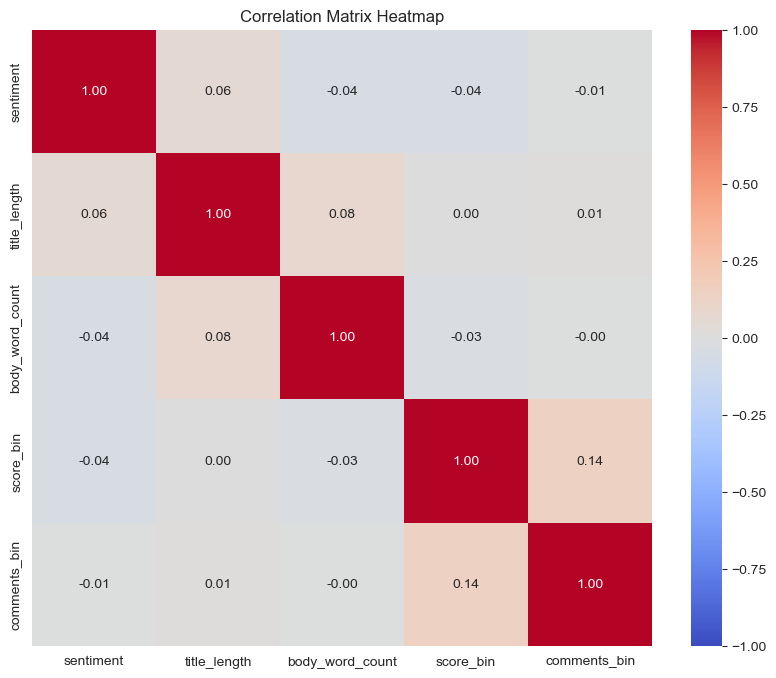

In [91]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations** :
The correlation matrix shows weak associations between sentiment and other numerical features:

Weak positive correlation with title length (0.060024) and weak negative correlation with body word count (-0.044163).
Weak negative correlations with score bin (-0.043824) and comments bin (-0.007083), suggesting subtle influences.
Overall, sentiment appears minimally impacted by these variables, warranting further exploration.

# Results:

### Engagement and Popular Topics:
- **Authors and Subreddits Generating Higher Engagement:**
   - **Authors:** GDT_Bot stands out as the top author, consistently generating significant engagement with an average of 52 comments per post and a relatively high average score of 15.0. This indicates that GDT_Bot's posts not only spark extensive discussions but also receive positive feedback from users. Other notable authors include ToTheGrave11, who, despite having a lower average number of comments, achieves a higher average score, suggesting that their posts are highly regarded by users.
   - **Subreddits:** The subreddit "hockey" emerges as the most engaging, with an average of 52 comments per post and a high average score of 15.0. This indicates a strong community interaction and appreciation for the content shared within this subreddit. "goldenknights" also garners notable engagement, with a lower average number of comments but a relatively high average score, indicating quality discussions and user interest.

- **Correlation between Number of Comments and Scores:**
   - There is a positive correlation (0.299) between the number of comments and the score of news articles. This indicates that as the number of comments increases, the score tends to increase as well, and vice versa. However, the correlation is not very strong, suggesting that other factors besides the number of comments may also influence the score of an article.
   - Articles that spark discussions and attract comments are more likely to receive higher scores, reflecting their popularity and relevance among users.
   
### Sentiment Analysis and Topic Modeling:
    
- **How do sentiment analysis techniques help in uncovering nuanced trends within news articles, and what insights can be gained from analyzing sentiment fluctuations?**
  - The sentiment distribution plot illustrates a balanced distribution of sentiment scores, with a noticeable presence of neutral sentiment and variability in positive and negative sentiments. For example, a balanced distribution of sentiment scores centered around a central tendency of 0 suggests a mix of positive, negative, and neutral sentiments within the dataset. Additionally, the presence of notable proportions of posts expressing extreme sentiments indicates the diversity of opinions or emotional responses elicited by news articles.
  - Understanding sentiment trends can inform various stakeholders, including journalists, policymakers, and marketers, about public sentiment towards specific issues, brands, or events covered in the news.

- **What role do topic modeling algorithms play in identifying prevalent themes or topics within news articles, and how can understanding topic popularity contribute to content strategy and audience engagement efforts?**
  - The observations from topic modeling provide insights into the diverse range of topics covered in the news articles dataset, along with their relative popularity or prevalence among users. Topics 5, 9, and 6 emerged as the most popular, indicating higher levels of user engagement and interest in these areas. By examining the top words associated with each topic, organizations can gain an understanding of the key subjects or discussions driving user engagement and interest.
  - Understanding topic popularity allows organizations to tailor their content strategy to align with audience interests and preferences.


# Conclusions:

In this project, I delved into two primary areas: engagement and popular topics, and sentiment analysis and topic modeling. Here's a summary of my findings and conclusions:

1. **Engagement and Popular Topics:**
   - Through my analysis, I identified top authors and subreddits generating higher engagement levels. GDT_Bot emerged as the most engaging author, consistently generating significant interaction with its posts. The "hockey" subreddit stood out as the most engaging community, fostering robust discussions and content appreciation.
   - I established a positive correlation between the number of comments and the score of news articles, indicating that higher engagement often leads to higher scores. However, I acknowledged the presence of other factors influencing article scores beyond just engagement metrics.

2. **Sentiment Analysis and Topic Modeling:**
   - Leveraging sentiment analysis techniques like VADER, I uncovered nuanced sentiment trends within news articles. Despite a balanced sentiment distribution, fluctuations over time provided valuable insights into public opinion and reactions.
   - Topic modeling, particularly with LDA, revealed prevalent themes within news articles, aiding in understanding audience interests and preferences for content creation and strategy.

### Research Questions:

- **Engagement and Popular Topics:**
  - I successfully explored the relationship between user engagement metrics and news article content, identifying top contributors to engagement and understanding the correlation between comments and scores.
  
- **Sentiment Analysis and Topic Modeling:**
  - My analysis effectively utilized sentiment analysis and topic modeling techniques to gain insights into sentiment trends and prevalent themes within news articles.

### Future Extensions:

- Integrating user behavior data, such as click-through rates and dwell times, could offer deeper insights into audience engagement and content effectiveness.
- Expanding the analysis to include multimedia content like images and videos could provide a more holistic understanding of user engagement and sentiment across different media types.

Overall, this project has enriched my understanding of user engagement and sentiment dynamics within online news communities, paving the way for future research and applications in content strategy and audience engagement efforts.
